In [39]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

warnings.filterwarnings("ignore")
# warnings.filterwarnings("default")

n =  100
Time taken by RK method: 0.0
Error RK methods  =  3.1641619109114114e-14


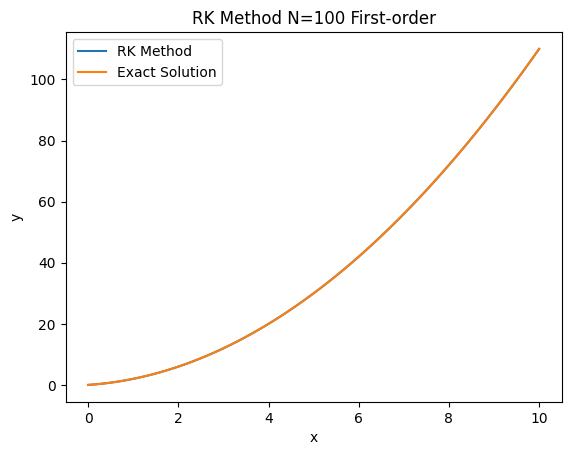

n =  1000
Time taken by RK method: 1.9986629486083984
Error RK methods  =  3.14480748315338e-13


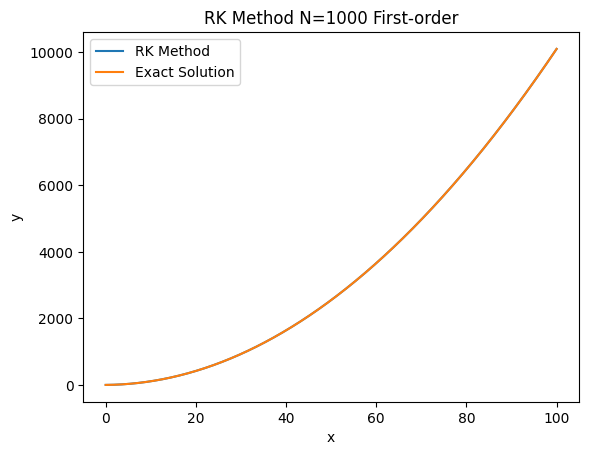

n =  10000
Time taken by RK method: 28.997421264648438
Error RK methods  =  4.363761710862541e-12


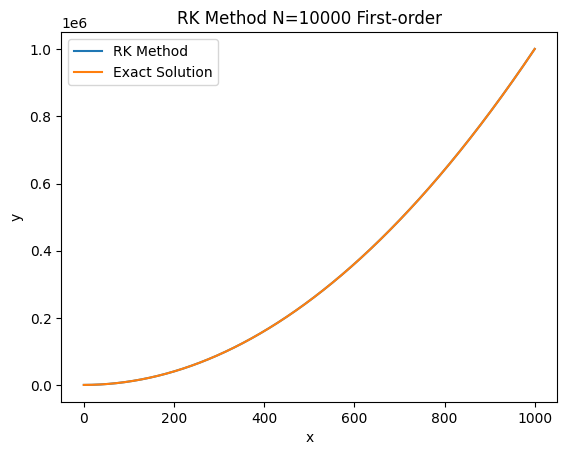

n =  100000
Time taken by RK method: 265.99955558776855
Error RK methods  =  3.0792361646818957e-11


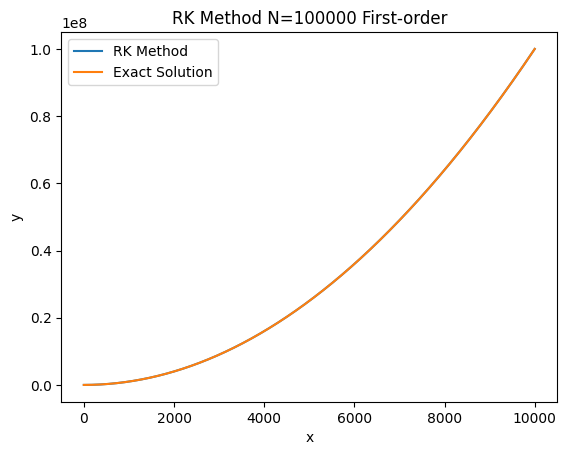

In [40]:
# 1-order
def exact_solution(x):
    return x*(x+1)

def f(x, y):
    return 2*x + 1

def RKMethod(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0
    
    for i in range(n):
        k1 = h*f(x[i], y[i])
        k2 = h*f(x[i] + h/2, y[i] + k1/2)
        k3 = h*f(x[i] + h/2, y[i] + k2/2)
        k4 = h*f(x[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        x[i+1] = x[i] + h
        
    return y

x0 = 0
y0 = 0
h = 0.1
N = [100,1000,10000,100000]

for n in N:
    print('n = ', n)
    x = np.linspace(x0, x0+h*n, n+1)
    y_exact = exact_solution(x)

    start = time.time()
    y_rk = RKMethod(f, x0, y0, h, n)
    stop = (time.time()-start)*1000
    print('Time taken by RK method:', stop)

    tol = np.abs(y_rk - y_exact)
    e_rk = np.mean(np.abs(tol/y_exact)[1:])*100
    print("Error RK methods  = ",e_rk)

    # Plot the results
    plt.plot(x, y_rk, label='RK Method')
    plt.plot(x, y_exact, label='Exact Solution')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'RK Method N={n} First-order')
    plt.show()


n=  100
Time taken by RK4 method: 5.003929138183594
Error RK4 methods  =  0.0004371683780309446


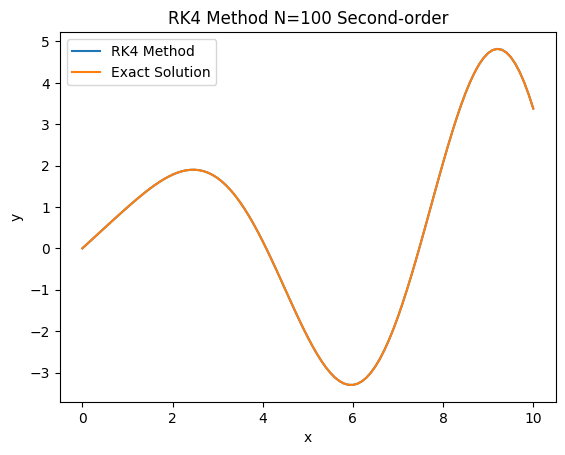

n=  1000
Time taken by RK4 method: 32.99880027770996
Error RK4 methods  =  0.02519981440541866


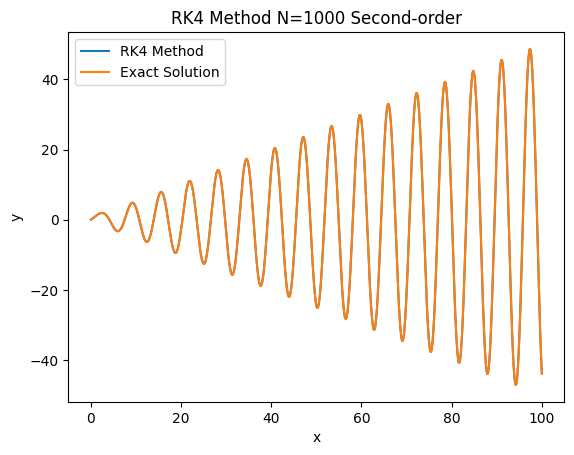

n=  10000
Time taken by RK4 method: 359.9972724914551
Error RK4 methods  =  0.14273461620790306


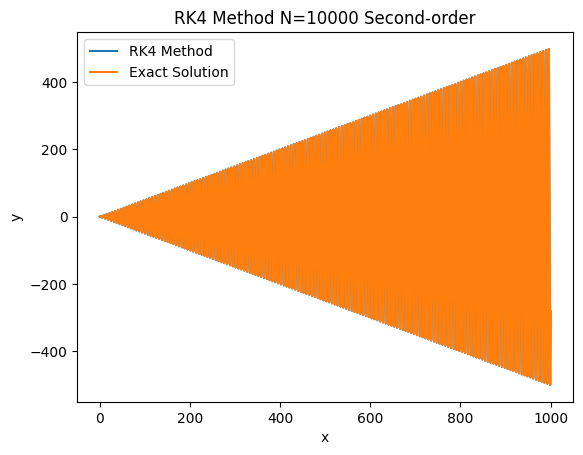

n=  100000
Time taken by RK4 method: 3334.9995613098145
Error RK4 methods  =  1.403415370945015


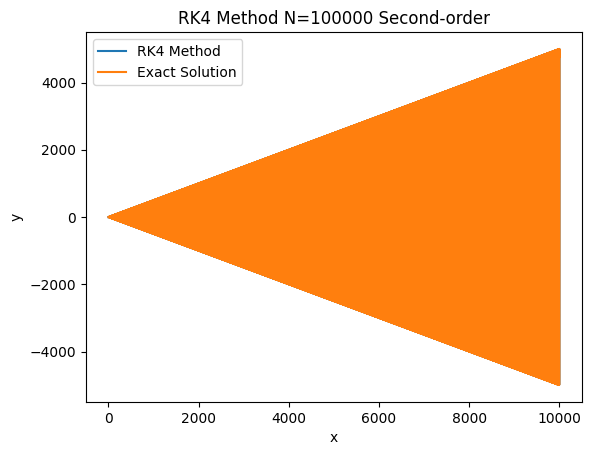

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def exact_solution(x):
    return 0.5*(3*np.sin(x)-x*np.cos(x))

def f(x, y):
    z = y[1]
    dy = np.zeros_like(y)
    dy[0] = z
    dy[1] = np.sin(x) - y[0]
    return dy

def RK4(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros((n+1, len(y0)))
    x[0] = x0
    y[0,:] = y0
    
    for i in range(n):
        k1 = h*f(x[i], y[i])
        k2 = h*f(x[i] + h/2, y[i] + k1/2)
        k3 = h*f(x[i] + h/2, y[i] + k2/2)
        k4 = h*f(x[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        x[i+1] = x[i] + h
        
    return y

x0 = 0
y0 = [0, 1] # initial values of y and z
h = 0.1
N=[100,1000,10000,100000]

for n in N:
    print("n= ",n)
    x = np.linspace(x0, x0+h*n, n+1)
    y_exact = exact_solution(x)

    start = time.time()
    y_rk = RK4(f, x0, y0, h, n)
    stop = (time.time()-start)*1000
    print('Time taken by RK4 method:', stop)

    tol = np.abs(y_rk[:,0] - y_exact)
    e_rk = np.mean(np.abs(tol/y_exact)[1:])*100
    print("Error RK4 methods  = ",e_rk)

    # Plot the results
    plt.plot(x, y_rk[:,0], label='RK4 Method')
    plt.plot(x, y_exact, label='Exact Solution')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'RK4 Method N={n} Second-order')
    plt.show()


n=  100
Time taken by RK method: 2.9897689819335938
Error RK methods  =  0.0001665329212760492


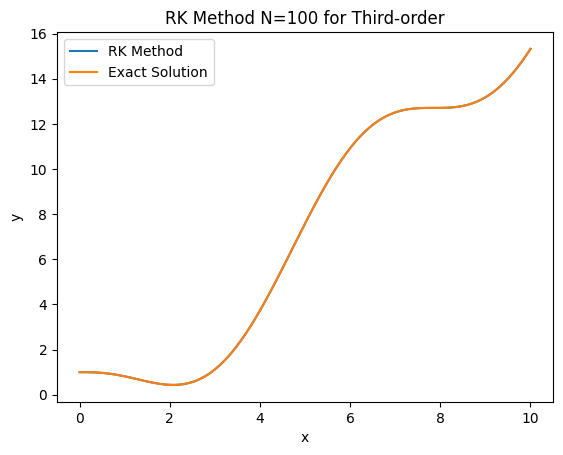

n=  1000
Time taken by RK method: 24.999618530273438
Error RK methods  =  6.67153510986216e-05


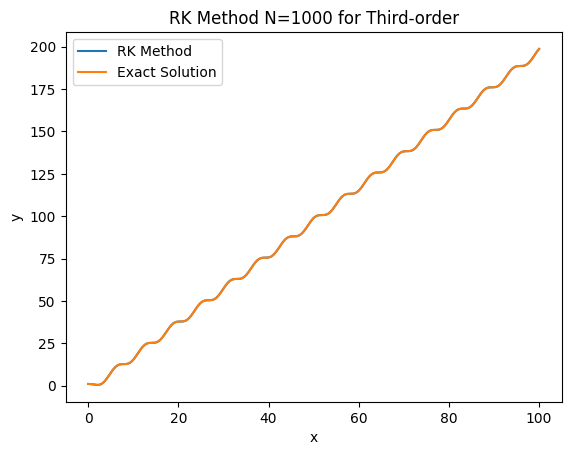

n=  10000
Time taken by RK method: 212.00013160705566
Error RK methods  =  5.456362177728567e-05


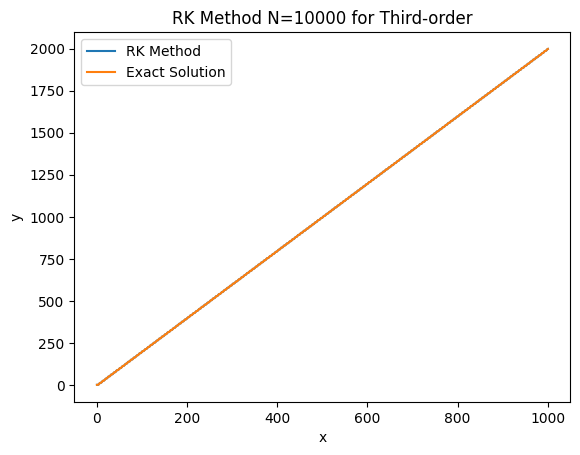

n=  100000
Time taken by RK method: 2211.000680923462
Error RK methods  =  5.3207722109956046e-05


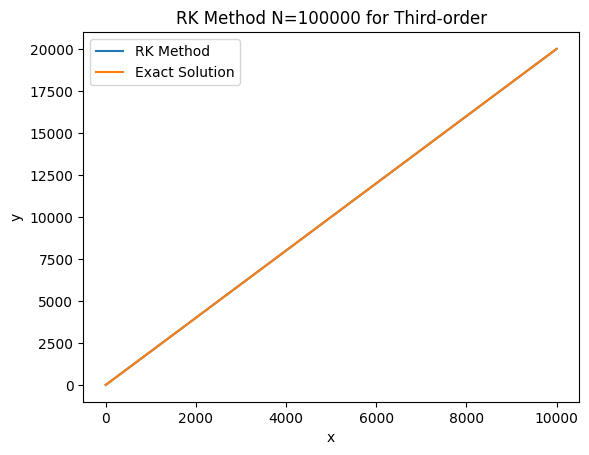

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import time

def exact_solution(x):
    return 2*x + 2*np.exp(-x) + 2*np.cos(x) - 3

def f(x, y):
    return np.array([y[1], y[2], -y[2]-y[1]-y[0]+2*x-1])

def RK4Method(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros((n+1, 3))
    x[0] = x0
    y[0,:] = y0
    
    for i in range(n):
        k1 = h*f(x[i], y[i,:])
        k2 = h*f(x[i] + h/2, y[i,:] + k1/2)
        k3 = h*f(x[i] + h/2, y[i,:] + k2/2)
        k4 = h*f(x[i] + h, y[i,:] + k3)
        y[i+1,:] = y[i,:] + (k1 + 2*k2 + 2*k3 + k4)/6
        x[i+1] = x[i] + h
        
    return y

x0 = 0
y0 = np.array([1, 0, 0])
h=0.1
N=[100,1000,10000,100000]

for n in N:
    print("n= ",n)
    x = np.linspace(x0, x0+h*n, n+1)
    y_exact = exact_solution(x)

    start = time.time()
    y_rk = RK4Method(f, x0, y0, h, n)
    stop = (time.time()-start)*1000
    print('Time taken by RK method:', stop)

    tol = np.abs(y_rk[:,0] - y_exact)
    e_rk = np.mean(np.abs(tol/y_exact)[1:])*100
    print("Error RK methods  = ",e_rk)

    # Plot the results
    plt.plot(x, y_rk[:,0], label='RK Method')
    plt.plot(x, y_exact, label='Exact Solution')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'RK Method N={n} for Third-order')
    plt.show()


n=  100
Time taken by RK method: 1.9953250885009766
Error RK methods  =  0.013014525488910375


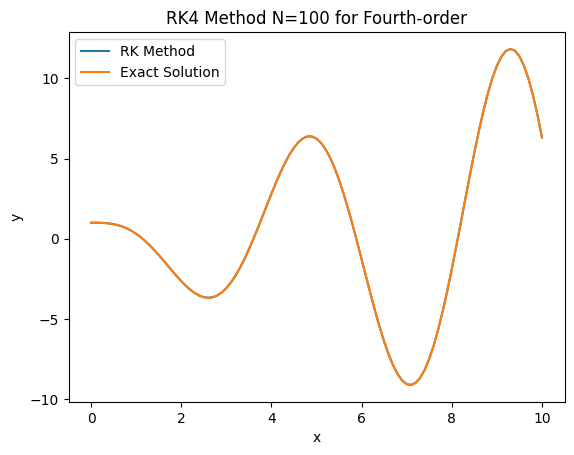

n=  1000
Time taken by RK method: 24.968385696411133
Error RK methods  =  0.10807173926090598


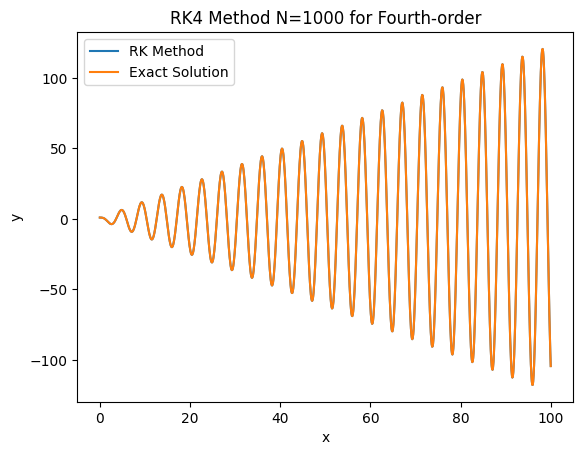

n=  10000
Time taken by RK method: 224.96509552001953
Error RK methods  =  1.8794472034159788


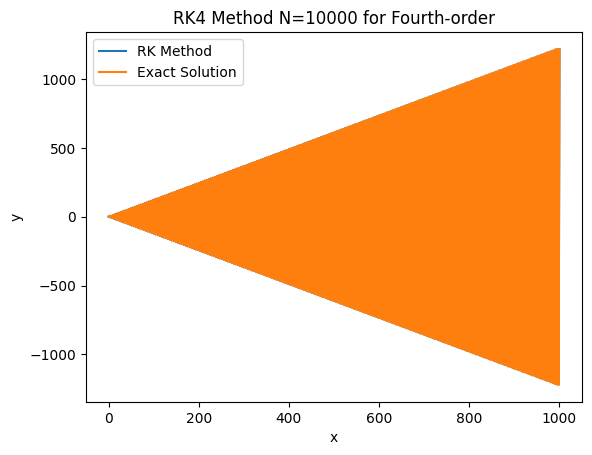

n=  100000
Time taken by RK method: 2131.998300552368
Error RK methods  =  27.189760126780637


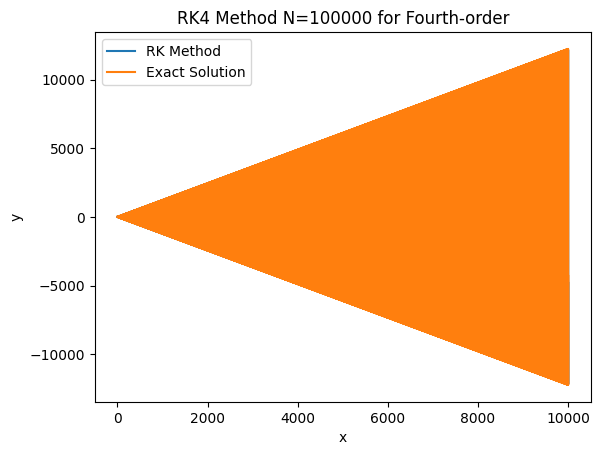

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    # Define the system of first-order ODEs
    return np.array([y[1], y[2], y[3], -4*y[2]-4*y[0]])

def RK4(f, x0, y0, h, n):
    # Implementation of the RK4 method
    x = np.zeros(n+1)
    y = np.zeros((n+1,4))
    x[0] = x0
    y[0,:] = y0
    
    for i in range(n):
        k1 = h*f(x[i], y[i,:])
        k2 = h*f(x[i] + h/2, y[i,:] + k1/2)
        k3 = h*f(x[i] + h/2, y[i,:] + k2/2)
        k4 = h*f(x[i] + h, y[i,:] + k3)
        y[i+1,:] = y[i,:] + (k1 + 2*k2 + 2*k3 + k4)/6
        x[i+1] = x[i] + h
        
    return y

# Define the initial conditions and step size
x0 = 0
y0 = np.array([1, 0, 0, -4])
h=0.1
N=[100,1000,10000,100000]

for n in N:
    print("n= ",n)
    # Solve the ODE using RK4 method
    start = time.time()
    y = RK4(f, x0, y0, h, n)
    stop = (time.time()-start)*1000
    print('Time taken by RK method:', stop)

    # Define the exact solution
    x = np.linspace(x0, x0+h*n, n+1)
    y_exact = ((x-1)*np.sin(np.sqrt(2)*x)/np.sqrt(2)) + ((x+1)*np.cos(np.sqrt(2)*x))

    # error 
    tol = np.abs(y[:,0] - y_exact)
    e_rk = np.mean(np.abs(tol/y_exact)[1:])*100
    print("Error RK methods  = ",e_rk)

    # Plot the results
    plt.plot(x, y[:,0], label='RK Method')
    plt.plot(x, y_exact, label='Exact Solution')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'RK4 Method N={n} for Fourth-order')
    plt.show()
